# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 576


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"


    # Create endpoint URL with each city
city_url = url + "appid=" + weather_api_key + "&q=" + city
   

        # Parse the JSON and retrieve data
city_weather = requests.get(city_url)
city_weather_json = city_weather.json()

print(city_weather_json)


{'coord': {'lon': 8.86, 'lat': 52.1653}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 287.78, 'feels_like': 287.49, 'temp_min': 286.21, 'temp_max': 288.58, 'pressure': 1018, 'humidity': 84}, 'visibility': 10000, 'wind': {'speed': 1.54, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1691611457, 'sys': {'type': 2, 'id': 265457, 'country': 'DE', 'sunrise': 1691553463, 'sunset': 1691607757}, 'timezone': 7200, 'id': 2817105, 'name': 'Vlotho', 'cod': 200}


In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()                           

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jeddah
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | muroto-misakicho
Processing Record 4 of Set 1 | san antonio de pale
Processing Record 5 of Set 1 | mejit
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | nemuro
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | ciudad lazaro cardenas
Processing Record 11 of Set 1 | medicine hat
Processing Record 12 of Set 1 | soc trang
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | faya-largeau
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | varena
Processing Record 17 of Set 1 | sault ste. marie
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | kolonia
Processing Record 21 of Set 1 | sonsorol village
City not fo

Processing Record 36 of Set 4 | port blair
Processing Record 37 of Set 4 | el-tor
Processing Record 38 of Set 4 | zhanaozen
Processing Record 39 of Set 4 | nookat
City not found. Skipping...
Processing Record 40 of Set 4 | pemba
Processing Record 41 of Set 4 | mumbwa
Processing Record 42 of Set 4 | sao vicente
Processing Record 43 of Set 4 | kudahuvadhoo
Processing Record 44 of Set 4 | singrauli
Processing Record 45 of Set 4 | arraial do cabo
Processing Record 46 of Set 4 | punta del este
Processing Record 47 of Set 4 | kristiansund
Processing Record 48 of Set 4 | mityana
Processing Record 49 of Set 4 | cabedelo
Processing Record 0 of Set 5 | salemi
Processing Record 1 of Set 5 | lucenec
Processing Record 2 of Set 5 | tafresh
Processing Record 3 of Set 5 | la foa
Processing Record 4 of Set 5 | tyukhtet
Processing Record 5 of Set 5 | porto novo
Processing Record 6 of Set 5 | gamay
Processing Record 7 of Set 5 | brokopondo
Processing Record 8 of Set 5 | kayangel
Processing Record 9 of Se

City not found. Skipping...
Processing Record 28 of Set 8 | fonadhoo
City not found. Skipping...
Processing Record 29 of Set 8 | praia da vitoria
Processing Record 30 of Set 8 | otukpa
Processing Record 31 of Set 8 | kuala belait
Processing Record 32 of Set 8 | weno
Processing Record 33 of Set 8 | pandan
Processing Record 34 of Set 8 | puerto deseado
Processing Record 35 of Set 8 | saint john
Processing Record 36 of Set 8 | taoudenni
Processing Record 37 of Set 8 | kingston
Processing Record 38 of Set 8 | wad rawah
Processing Record 39 of Set 8 | takoradi
Processing Record 40 of Set 8 | el ksour
Processing Record 41 of Set 8 | scott
Processing Record 42 of Set 8 | bousso
Processing Record 43 of Set 8 | valparaiso
Processing Record 44 of Set 8 | akkol'
Processing Record 45 of Set 8 | zabid
Processing Record 46 of Set 8 | mahalapye
Processing Record 47 of Set 8 | senanga
Processing Record 48 of Set 8 | tamanrasset
Processing Record 49 of Set 8 | kone
Processing Record 0 of Set 9 | san lu

Processing Record 15 of Set 12 | slobodskoy
Processing Record 16 of Set 12 | leer
Processing Record 17 of Set 12 | yangshuo
Processing Record 18 of Set 12 | yelizovo
Processing Record 19 of Set 12 | el calafate
Processing Record 20 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 21 of Set 12 | gondar
Processing Record 22 of Set 12 | kwang binh
Processing Record 23 of Set 12 | garachico
Processing Record 24 of Set 12 | al ghayzah
Processing Record 25 of Set 12 | vlotho
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jeddah,21.5169,39.2192,306.07,52,0,2.57,SA,1691611457
1,guerrero negro,27.9769,-114.0611,300.92,58,13,7.47,MX,1691611386
2,muroto-misakicho,33.2833,134.1500,300.52,91,100,10.41,JP,1691611459
3,san antonio de pale,-1.4014,5.6325,296.91,81,94,5.30,GQ,1691611281
4,mejit,10.2753,170.8646,300.92,71,77,4.62,MH,1691611459


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jeddah,21.5169,39.2192,306.07,52,0,2.57,SA,1691611457
1,guerrero negro,27.9769,-114.0611,300.92,58,13,7.47,MX,1691611386
2,muroto-misakicho,33.2833,134.1500,300.52,91,100,10.41,JP,1691611459
3,san antonio de pale,-1.4014,5.6325,296.91,81,94,5.30,GQ,1691611281
4,mejit,10.2753,170.8646,300.92,71,77,4.62,MH,1691611459


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

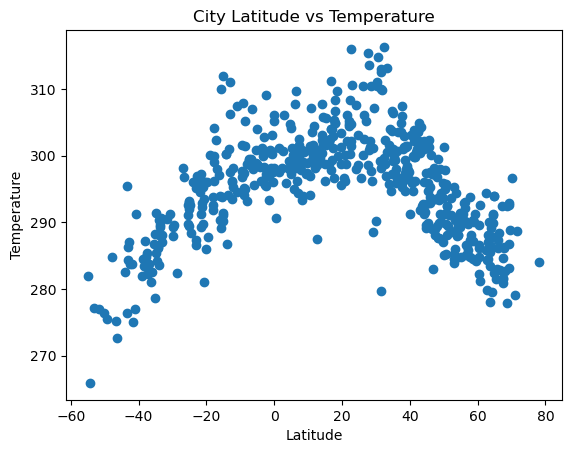

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

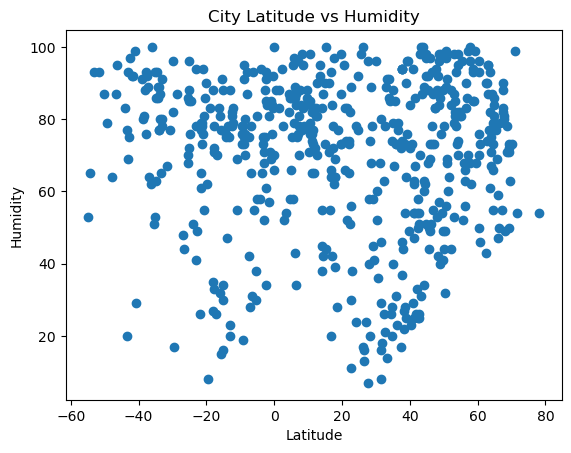

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

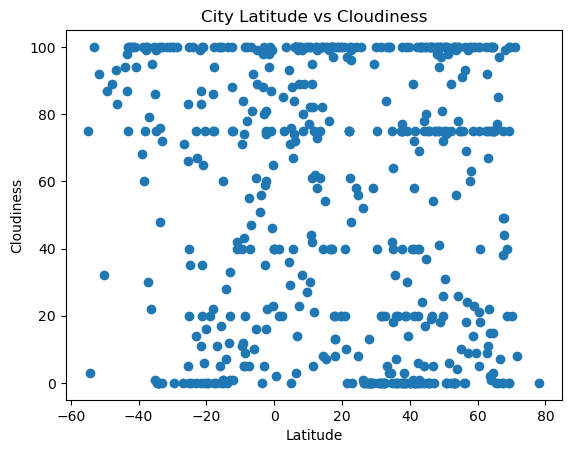

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

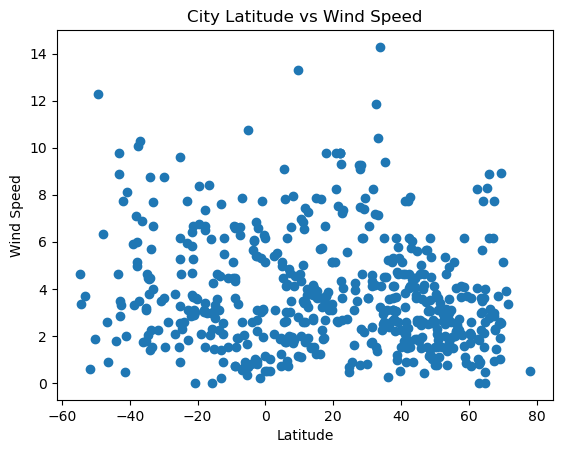

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
#def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jeddah,21.5169,39.2192,306.07,52,0,2.57,SA,1691611457
1,guerrero negro,27.9769,-114.0611,300.92,58,13,7.47,MX,1691611386
2,muroto-misakicho,33.2833,134.1500,300.52,91,100,10.41,JP,1691611459
4,mejit,10.2753,170.8646,300.92,71,77,4.62,MH,1691611459
5,jamestown,42.0970,-79.2353,300.94,54,0,7.72,US,1691611231


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,san antonio de pale,-1.4014,5.6325,296.91,81,94,5.30,GQ,1691611281
7,ushuaia,-54.8000,-68.3000,281.96,53,75,4.63,AR,1691611460
8,puerto natales,-51.7236,-72.4875,277.06,93,92,0.61,CL,1691611291
12,port-aux-francais,-49.3500,70.2167,275.56,79,87,12.29,TF,1691611462
14,grytviken,-54.2811,-36.5092,265.93,65,3,3.35,GS,1691611463


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.4384422514171809


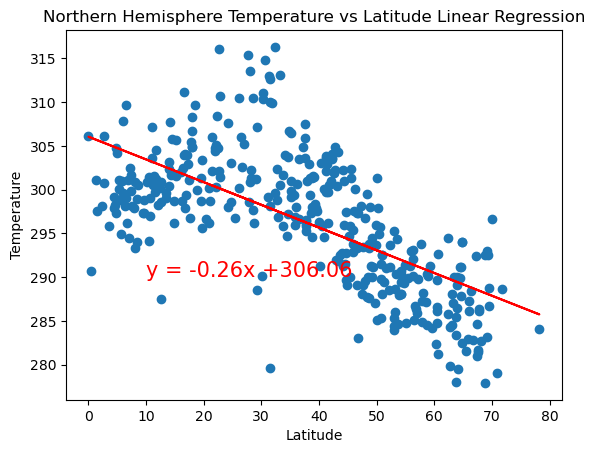

In [36]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(10,290),fontsize=15,color="red")
plt.title('Northern Hemisphere Temperature vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")

plt.show()



The r-squared is: 0.6582275650573477


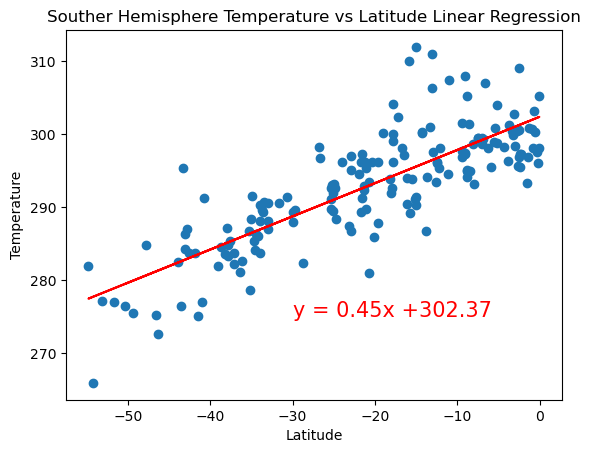

In [37]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-30,275),fontsize=15,color="red")
plt.title('Souther Hemisphere Temperature vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0004511525626147448


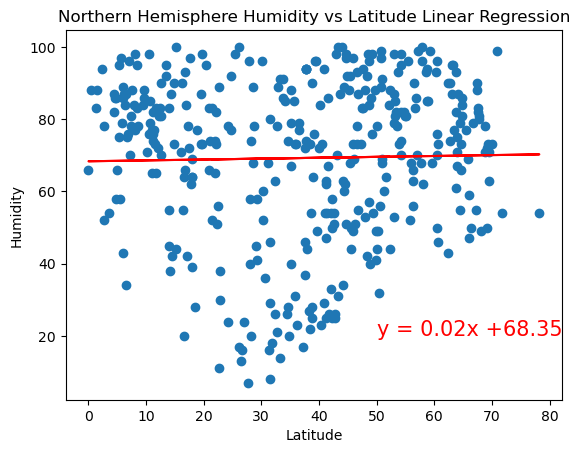

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title('Northern Hemisphere Humidity vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.02381166451701038


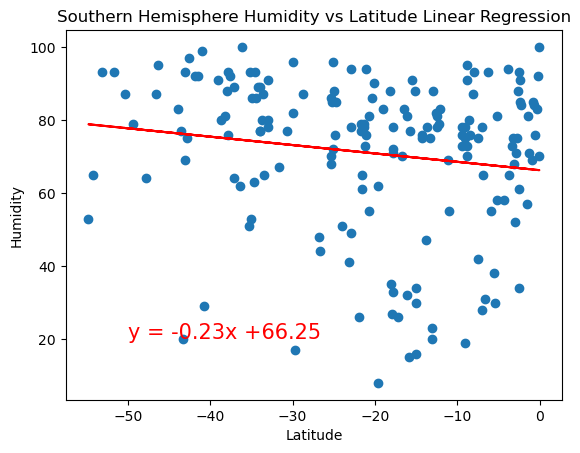

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.title('Southern Hemisphere Humidity vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.010619676374619531


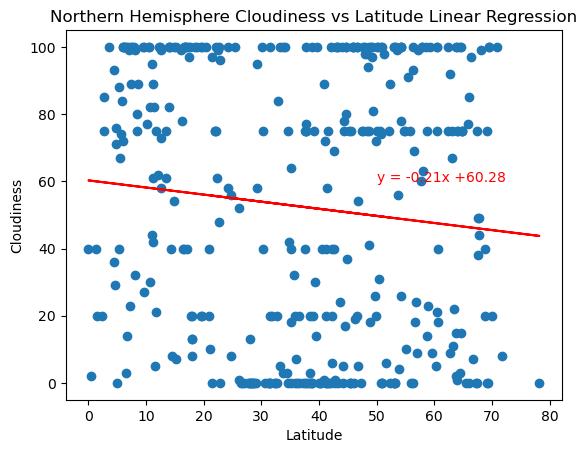

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(50,60),fontsize=10,color="red")
plt.title('Northern Hemisphere Cloudiness vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.03408538698323901


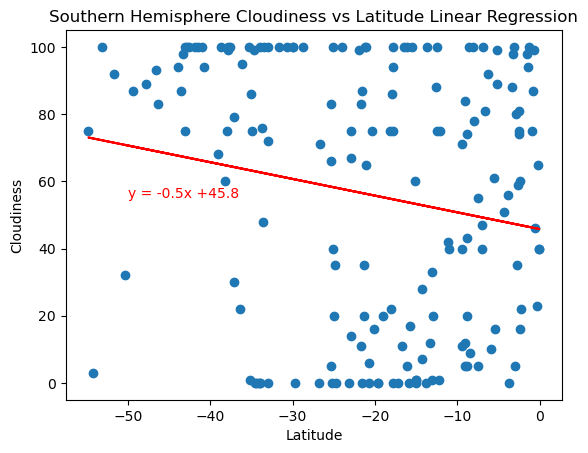

In [51]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-50,55),fontsize=10,color="red")
plt.title('Southern Hemisphere Cloudiness vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.031327448396016915


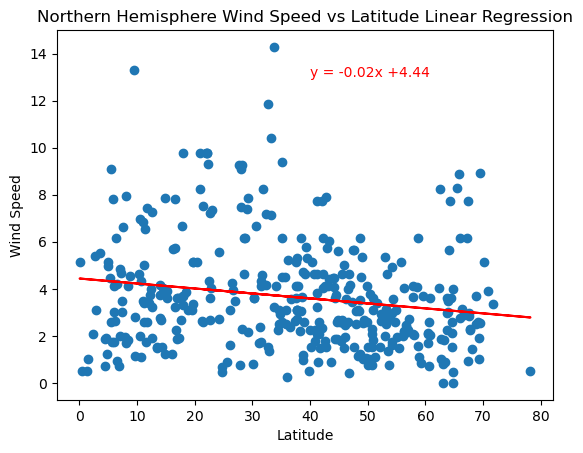

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(40,13),fontsize=10,color="red")
plt.title('Northern Hemisphere Wind Speed vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")

plt.show()

The r-squared is: 0.02803216316977356


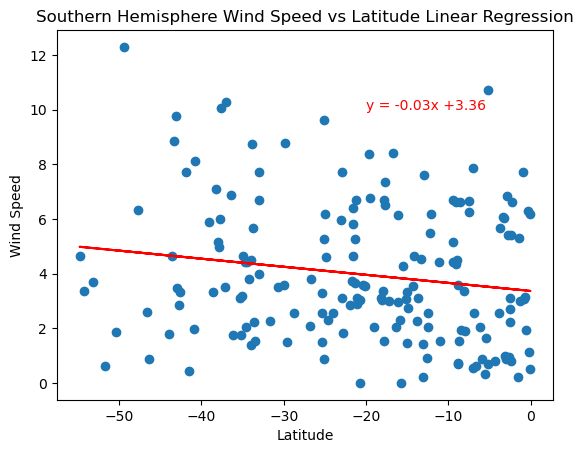

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))   

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-20,10),fontsize=10,color="red")
plt.title('Southern Hemisphere Wind Speed vs Latitude Linear Regression')

print(f"The r-squared is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE